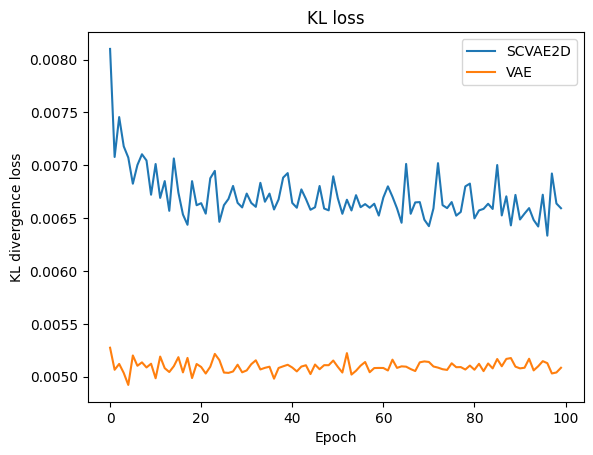

In [29]:
from requests import get
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from crossval_result_loader import get_reduction_factor

path_to_csv = "plots/SCVAE2D_EXACT/kl_loss_cross.csv"

df = pd.read_csv(path_to_csv)

# keep only columns with with "val_kl_loss" and not "MIN" in the name or is named "epoch" 

for column in df.columns:
    if "val_kl_loss" in column and "val_kl_loss_" not in column:
        if "SCVAE2D" in column:
            #rename column
            df = df.rename(columns={column: "SCVAE2D"})
            reduction_factor = get_reduction_factor(column)
            
            df["SCVAE2D"] = df["SCVAE2D"] / reduction_factor
            continue
        if "VAE" in column:
            # rename column
            df = df.rename(columns={column: "VAE"})
            reduction_factor = get_reduction_factor(column)
            
            df["VAE"] = df["VAE"] / reduction_factor
            
            
            continue
        continue
    
    if column == "epoch":
        continue
    
    df = df.drop(column, axis=1)
    
    
# title of the plot
plt.title("KL loss")
# name of the x axis
plt.xlabel("Epoch")
# name of the y axis
plt.ylabel("KL divergence loss")
        
# plot the data with both VAE and SCVAE2D
plt.plot(df["epoch"], df["SCVAE2D"], label="SCVAE2D")
plt.plot(df["epoch"], df["VAE"], label="VAE")
plt.legend()




